<a href="https://colab.research.google.com/github/WaseemAkram10000/Internship-Projects/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Filepath
file_path = 'laptop prices.csv'

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [4]:
# Step 1: Load the dataset
df = pd.read_csv(file_path)


In [5]:
# Data Exploration
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())

Dataset Head:
     brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0    ASUS           Intel        Core i3            10th   4 GB     DDR4   
1  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3    ASUS           Intel        Core i5            10th   8 GB     DDR4   
4    ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   

      ssd      hdd       os  os_bit graphic_card_gb  weight     warranty  \
0    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
1    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
2    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
3  512 GB     0 GB  Windows  32-bit            2 GB  Casual  No warranty   
4    0 GB   512 GB  Windows  64-bit            0 GB  Casual  No warranty   

  Touchscreen msoffice  Price   rating  Number of Ratings  Number of Re

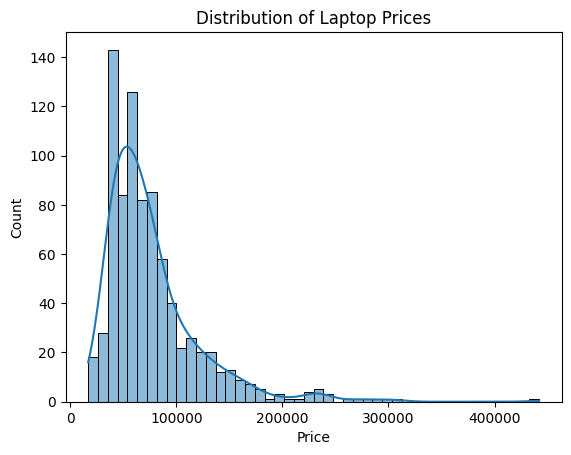

In [6]:
# Visualize the distribution of the target variable (Price)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Laptop Prices')
plt.show()

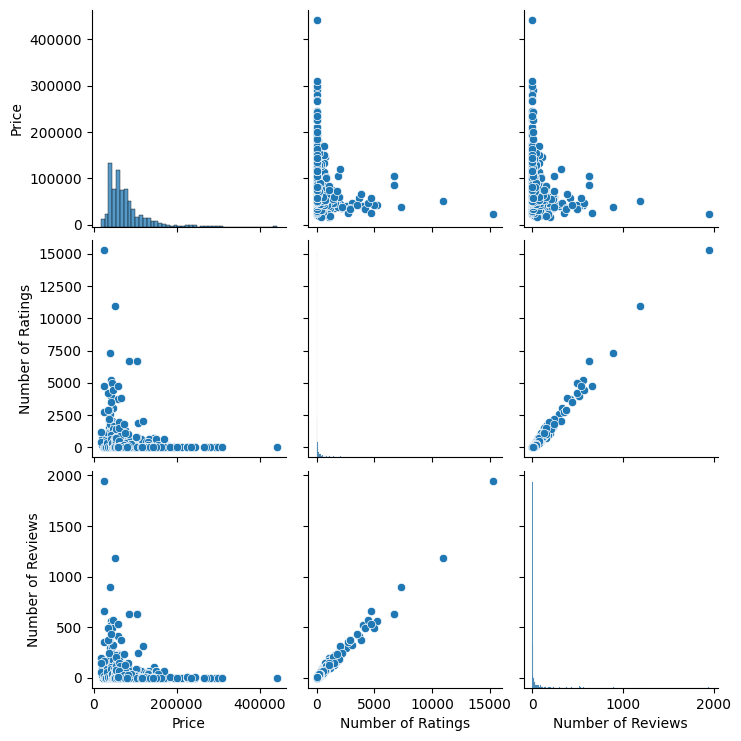

In [7]:
# Visualize relationships between features and target variable
sns.pairplot(df)
plt.show()

In [8]:
# Step 2: Data Preprocessing and Feature Engineering
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64


In [9]:
# Handle missing values (if any)
df = df.dropna()  # Dropping rows with missing values for simplicity

In [10]:
# Convert categorical columns to numerical
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [11]:
# Feature scaling
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [12]:
# Step 3: Split the data into training and testing sets
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 4: Model Selection and Training
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [15]:
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model

In [16]:
# Step 5: Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

for model_name, model in trained_models.items():
    mae, rmse = evaluate_model(model, X_test, y_test)
    print(f"{model_name} - MAE: {mae}, RMSE: {rmse}")

Linear Regression - MAE: 0.432176348476466, RMSE: 0.6885798734737727
Random Forest - MAE: 0.2860755773765587, RMSE: 0.5846661440561662
Gradient Boosting - MAE: 0.31462902291940364, RMSE: 0.601076982247702


In [17]:
# Cross-validation
def cross_val(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores

for model_name, model in models.items():
    scores = cross_val(model, X, y)
    print(f"{model_name} - Cross-Validation RMSE: {scores.mean()}")

Linear Regression - Cross-Validation RMSE: 0.7828636881582345
Random Forest - Cross-Validation RMSE: 0.7368779115436246
Gradient Boosting - Cross-Validation RMSE: 0.6880702219334448


In [18]:
# Sample prediction
sample_data = X_test.iloc[0].values.reshape(1, -1)
predicted_price = trained_models['Linear Regression'].predict(sample_data)
print(f'Sample Predicted Price: {predicted_price[0]}')

Sample Predicted Price: 0.6900953951677803


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
# Save the trained models, encoders, and scaler
import pickle

for model_name, model in trained_models.items():
    with open(f'/content/{model_name.replace(" ", "_").lower()}_model.pkl', 'wb') as file:
        pickle.dump(model, file)

with open('/content/label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

with open('/content/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)